In [2]:
# Importações
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_user = pd.read_parquet('../data/yelp_dataset/yelp_academic_dataset_user_0.parquet')
df_user2 = pd.read_parquet('../data/yelp_dataset/yelp_academic_dataset_user_1.parquet')
df_user = pd.concat([df_user, df_user2])
del df_user2

# Ideias

- user_id serve para sincronizar o usuário, mas será que os usuários que estão no teste estão no treino?
- name podemos dropar
- review_count serve como um termômetro de engajamento
- yelping_since pode ser usado para calcular a idade da conta
- friends -> podemos recomendar o que um amigo gosta diretamente
- useful, funny, cool -> podemos usar para calcular um score de engajamento junto com o review_count
- fans -> um escore de popularidade
- elite é como o local guides do google, mas como isso nos ajuda?
- average_stars -> pode ser usado para determinar o quão chato o usuário é, dividindo pela mediana
- compliments: todos podem ser usados para calcular um score de engajamento

# EDA

## user_id

In [4]:
teste = pd.read_csv('../data/evaluation/eval_users.csv')

In [7]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        uint32 
 3   yelping_since       object 
 4   useful              uint32 
 5   funny               uint32 
 6   cool                uint32 
 7   elite               object 
 8   friends             object 
 9   fans                uint32 
 10  average_stars       float32
 11  compliment_hot      uint32 
 12  compliment_more     uint32 
 13  compliment_profile  uint32 
 14  compliment_cute     uint32 
 15  compliment_list     uint32 
 16  compliment_note     uint32 
 17  compliment_plain    uint32 
 18  compliment_cool     uint32 
 19  compliment_funny    uint32 
 20  compliment_writer   uint32 
 21  compliment_photos   uint32 
dtypes: float32(1), object(5), uint32(16)
memory usage: 204.7+ MB


In [5]:
teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      1000 non-null   object
 1   user_perfil  1000 non-null   object
 2   gt_reclist   1000 non-null   object
 3   reclist      1000 non-null   object
dtypes: object(4)
memory usage: 31.4+ KB


In [6]:
teste.head()

,user_id,user_perfil,gt_reclist,reclist
0,-1BSu2dt_rOAqllw9ZDXtA,5XsC0tB8chKjTIW7mU6TnQ,"['5XsC0tB8chKjTIW7mU6TnQ', 'wn4U347OALm5H0MOBR...","['XTIc2pKNdmmvX60lIHV0OQ', 'GyvtAyCurqFGovXp-t..."
1,-6DoXmdXEy_P5N-QZzntgA,Ifw5wqcChnL4zBigtR7NKA,"['Ifw5wqcChnL4zBigtR7NKA', 'v1GCQz7ZsntWI-GlGP...","['QB0NhiW--2rje9Fr1ek2eA', 'o4IiNbNybcy-L4vzTS..."
2,-8NOuak4Sipn7-zy7Nk5hg,OKPUO8zvBBL-OA6-SfDx8Q,"['OKPUO8zvBBL-OA6-SfDx8Q', 'OHplb2m_dKPXY46mS0...","['M6yUUIE8-incodeeJrMpVQ', 'fw6PlWy2ghCzuUH24p..."
3,-8rSnT5ztVk6vmTDkxTqsQ,VSjoo6kJ9MU4G0cfO_-CRA,"['VSjoo6kJ9MU4G0cfO_-CRA', 'DH-vk-XzWMT9rRLcbB...","['3zK9LTY3TgH7nU18-dnXtA', 'DH-vk-XzWMT9rRLcbB..."
4,-C7xxeVQI5qEZGAzFdx-cg,rXqlpCH6z9rSFNCL76FfLw,"['rXqlpCH6z9rSFNCL76FfLw', 'WY_dcOTyRA-AgksCXi...","['6aDmYbqNKeWn9tynvFQa-w', 'nMHM74eFQuJyS_a7EV..."


In [8]:
# contando quantos usuários do teste estão no df_user
teste['user_id'].isin(df_user['user_id']).sum()

1000

> Como esperado, todos estão no df_user.

> Depois explorarei mais o teste... por ora vamos voltar ao user dataset.

In [9]:
del teste

## name

In [10]:
# dropando
df_user.drop(columns=['name'], inplace=True)

## review_count

In [14]:
df_user.shape

(1987897, 21)

In [12]:
df_user.review_count.describe()

count    1.987897e+06
mean     2.339441e+01
std      8.256699e+01
min      0.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.700000e+01
max      1.747300e+04
Name: review_count, dtype: float64

In [15]:
# visualizando os usuarios com maior review_count
df_user.sort_values(by='review_count', ascending=False).head(10)

,user_id,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
17169,Hi10sGSZNxQH3NLyWSZ1oA,17473,2009-05-26 11:33:58,206296,185823,195814,"2014,2015,2016,2017,2018,2019,20,20,2021","uZcWE40gWJHjLT_VyNBp1Q, N52nbyDKZte4PUfJVNpkGQ...",3493,3.77,...,431,402,130,45,2408,6565,7655,7655,1644,4053
795339,8k3aO-mPeyhbR5HUucA5aA,16978,2007-12-08 14:56:45,152979,84992,125516,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","Isb9ZKTK4L5nkOpyXypDPQ, d3rfsXGWtS7fpGsYfy_C7Q...",1462,3.35,...,327,222,55,84,2204,3786,3618,3618,2731,256
4723,hWDybu_KvYLSdEFzGrniTw,16567,2009-03-08 21:47:44,173089,98459,144849,"2010,2011,2012,2013,2014,2015,2016,2017,2018,2...","sZ0Qxjn12H8jjHBPLQW32w, Lkk3DqzhvqwpiQKwwAyZcw...",867,3.67,...,586,541,34,76,2466,5264,6728,6728,5811,2224
606393,RtGqdDBvvBCjcu5dUqwfzA,12868,2010-10-17 06:35:06,11109,3747,3292,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...","hz79Mq7EGhHXZkIspAQtrg, LJE8g5sbnmu5Ua9YGN9SKw...",300,3.87,...,20,3,8,7,146,175,173,173,97,11
152,P5bUL3Engv-2z6kKohB6qQ,9941,2006-05-31 21:27:42,27549,10772,21375,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","hfY2Soz8LWSA0oRVcYuRmg, Y6_gZa4jVXv0d4qiMbbycw...",825,3.81,...,130,113,47,34,511,1073,1199,1199,482,252
3977,nmdkHL2JKFx55T3nq5VziA,8363,2011-11-29 15:50:53,57242,28960,46435,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...","TAc2-YzVKBLPvPhUV3_1vw, LK1LOOqwJBAPF85e5p2cQg...",921,3.75,...,69,23,20,6,340,742,742,742,487,678
17727,bQCHF5rn5lMI9c5kEwCaNA,8354,2012-03-18 10:04:51,42959,21176,36600,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...","I7TQJq7cn8TmQgoDZNS4Ug, _sIfwLSJsMpoHKESyaK1zg...",362,3.87,...,25,11,1,0,170,784,763,763,210,470
7394,8RcEwGrFIgkt9WQ35E6SnQ,7738,2009-11-06 22:53:16,8110,3868,3165,"2010,2011","NO2sCw8wC8piNMyRpt0pgA, _Y9mKwyNGD_pJOhN88xOoA...",288,3.49,...,23,7,4,14,140,229,98,98,68,81
10873,Xwnf20FKuikiHcSpcEbpKQ,6766,2011-06-10 03:52:07,8348,3624,5062,,"pMLCWPNK3Vln8L86yD0Gyg, 2kioNdRrX7ITSI6nvJtDNg...",285,3.32,...,40,14,2,1,218,509,303,303,79,99
1229,CxDOIDnH8gp9KXzpBHJYXw,6679,2009-11-09 20:44:45,23254,9326,14773,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ahXJ4DktihtIc7emzuyK7g, Bf-X9oxiiRvzgrwguUWoeg...",828,3.34,...,195,38,69,92,1382,3757,1692,1692,480,1581


> Tem uns malucos que fizeram mais de mil reviews, mas 75% dos usuários estão abaixo de 17 reviews.

<AxesSubplot:>

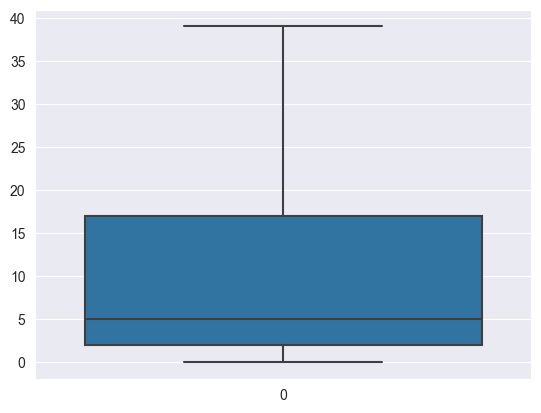

In [16]:
# boxplot sem outliers
sns.boxplot(df_user.review_count, showfliers=False)

C:\Users\alexv\anaconda3\envs\RedesNeuraisProfundas\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:>

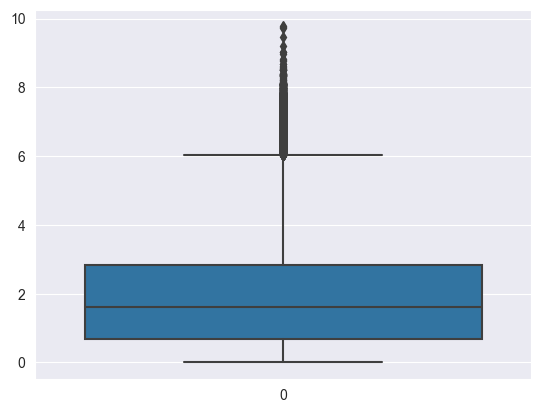

In [18]:
# jogar para escala logarítmica
sns.boxplot(np.log(df_user.review_count))

> Bem mais comportado

## yelping_since

In [19]:
# convertendo para datetime
df_user.yelping_since = pd.to_datetime(df_user.yelping_since)

In [20]:
df_user.yelping_since.describe()

C:\Users\alexv\anaconda3\envs\RedesNeuraisProfundas\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                 1987897
unique                1980183
top       2017-05-07 23:58:02
freq                        3
first     2004-10-12 08:46:11
last      2022-01-19 17:15:47
Name: yelping_since, dtype: object

<AxesSubplot:xlabel='yelping_since', ylabel='Count'>

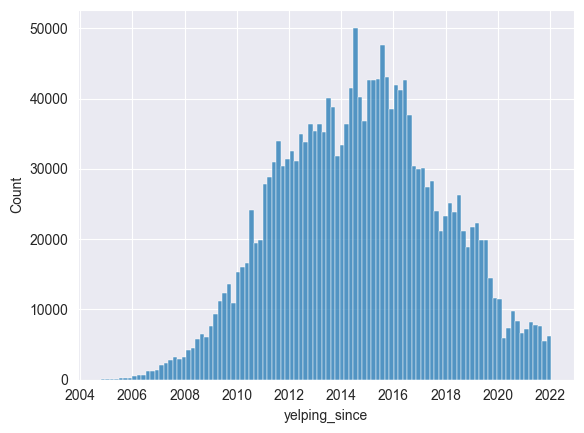

In [23]:
# plotando a distribuição
sns.histplot(df_user.yelping_since, bins=100)

> Interessante que a plataforma teve um boom de 2010 até 2016, depois começou a cair.

In [24]:
# convertendo para idade da conta
df_user['account_age'] = (pd.to_datetime('today') - df_user.yelping_since).dt.days

In [25]:
df_user.account_age.describe()

count    1.987897e+06
mean     3.052261e+03
std      1.130974e+03
min      3.910000e+02
25%      2.271000e+03
50%      3.047000e+03
75%      3.881000e+03
max      6.699000e+03
Name: account_age, dtype: float64

## friends

In [27]:
# apenas dropar por enquanto
df_user.drop(columns=['friends'], inplace=True)

In [28]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 21 columns):
 #   Column              Dtype         
---  ------              -----         
 0   user_id             object        
 1   review_count        uint32        
 2   yelping_since       datetime64[ns]
 3   useful              uint32        
 4   funny               uint32        
 5   cool                uint32        
 6   elite               object        
 7   fans                uint32        
 8   average_stars       float32       
 9   compliment_hot      uint32        
 10  compliment_more     uint32        
 11  compliment_profile  uint32        
 12  compliment_cute     uint32        
 13  compliment_list     uint32        
 14  compliment_note     uint32        
 15  compliment_plain    uint32        
 16  compliment_cool     uint32        
 17  compliment_funny    uint32        
 18  compliment_writer   uint32        
 19  compliment_photos   uint32        
 20  ac

## useful, funny, cool

In [29]:
# verificando se há algum valor nulo
df_user[['useful', 'funny', 'cool']].isna().sum()

useful    0
funny     0
cool      0
dtype: int64

> Nenhum nulo.

In [30]:
# vamos verificar o comportamento dos dados
df_user[['useful', 'funny', 'cool']].describe()

,useful,funny,cool
count,1.987897e+06,1.987897e+06,1.987897e+06
mean,4.229634e+01,1.697054e+01,2.379291e+01
std,6.414806e+02,4.078034e+02,5.653513e+02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.000000e+00,0.000000e+00,0.000000e+00
75%,1.300000e+01,2.000000e+00,3.000000e+00
max,2.062960e+05,1.858230e+05,1.998780e+05


> Boa parte das pessoas não costumam votar muito para funny ou cool. O useful é mais popular, mas 75% das pessoas votaram menos de 12+1 vezes.

<AxesSubplot:xlabel='useful', ylabel='Count'>

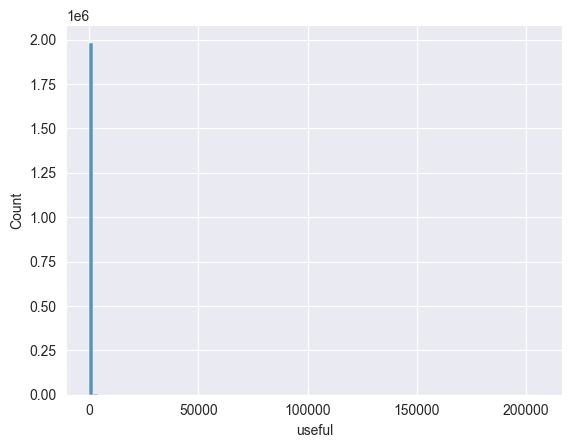

In [31]:
# verificando a distribuição
sns.histplot(df_user.useful, bins=100)

> Presença de outliers. Vamos aplicar log.

C:\Users\alexv\anaconda3\envs\RedesNeuraisProfundas\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='useful', ylabel='Count'>

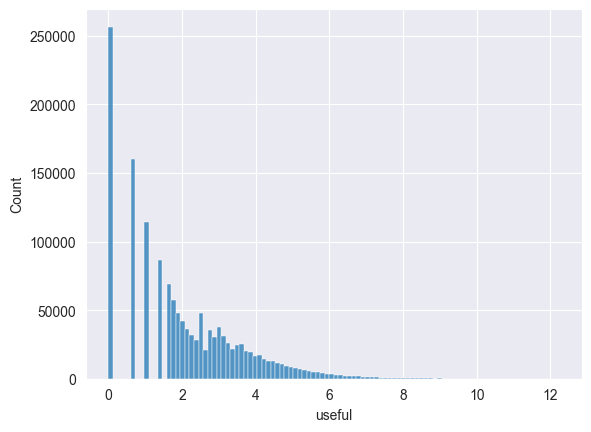

In [32]:
sns.histplot(np.log(df_user.useful), bins=100)

> Mais comportado.

## fans

In [33]:
# verificando se há algum valor nulo
df_user.fans.isna().sum()

0

In [34]:
# verificando o comportamento dos dados
df_user.fans.describe()

count    1.987897e+06
mean     1.465740e+00
std      1.813075e+01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.249700e+04
Name: fans, dtype: float64

C:\Users\alexv\anaconda3\envs\RedesNeuraisProfundas\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='fans', ylabel='Count'>

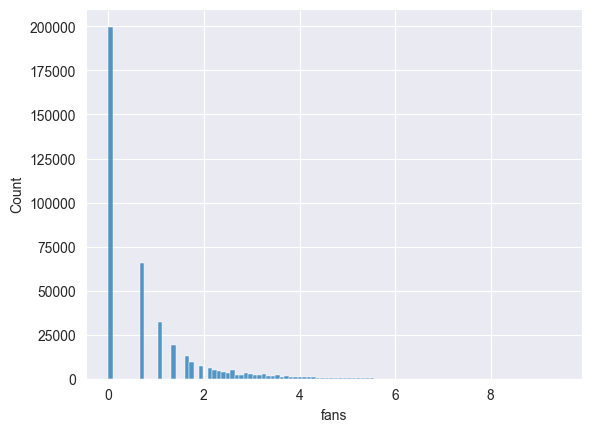

In [37]:
# verificando a distribuição
sns.histplot(np.log(df_user.fans), bins=100)

> Boa parte das pessoas não possuem fans.

In [38]:
# verificando as pessoas com maior quantidade de fans
df_user.sort_values(by='fans', ascending=False).head(10)

,user_id,review_count,yelping_since,useful,funny,cool,elite,fans,average_stars,compliment_hot,...,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,account_age
5444,37cpUoM8hlkSQfReIEBd-Q,1882,2009-04-25 14:54:26,22860,10965,15350,"2012,2013,2014,2015,2016,2017,2018,2019,20,20,...",12497,4.39,400,...,61,130,29,453,685,1002,1002,498,1829,5043
198889,hizGc5W1tBHPghM5YKCAtg,1825,2009-05-22 20:19:55,48711,32078,39747,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",3642,4.23,6615,...,419,375,253,3152,18529,7910,7910,2543,1676,5016
17169,Hi10sGSZNxQH3NLyWSZ1oA,17473,2009-05-26 11:33:58,206296,185823,195814,"2014,2015,2016,2017,2018,2019,20,20,2021",3493,3.77,4076,...,402,130,45,2408,6565,7655,7655,1644,4053,5012
200787,JjXuiru1_ONzDkYVrHN0aw,1424,2009-08-23 13:03:27,183512,129638,173423,"2011,2012,2013,2014,2015,2016,2017,2018,2019,2...",3243,4.18,21353,...,6411,2974,2413,13970,101097,49967,49967,15934,56104,4923
1,j14WgRoU_-2ZE1aw1dXrJg,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",3138,3.74,1145,...,184,157,251,1847,7054,3131,3131,1521,1946,5133
74,VHdY6oG2JPVNjihWhOooAQ,2101,2005-07-21 01:16:04,47831,28830,44899,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...",2627,4.22,6104,...,393,963,153,2124,16674,7324,7324,2313,548,6417
198807,iLjMdZi0Tm7DQxX1C1_2dg,2434,2007-07-31 14:47:00,34949,26293,28216,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...",2547,3.98,2604,...,274,341,118,2282,8989,5080,5080,1360,601,5677
220566,lt7bNHl-TXziny4FETu8nA,949,2015-06-18 04:19:47,22265,8640,17435,"2016,2017,2018,2019,20,20,2021",2451,4.40,327,...,17,13,2,358,3186,1033,1033,189,348,2798
397584,fgwI3rYHOv1ipfVfCSx7pg,1926,2009-09-17 09:11:14,46504,33332,40870,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...",2424,4.33,4328,...,180,230,90,1777,11662,6245,6245,1332,1627,4898
136,ITa3vh5ERI90G_WP4SmGUQ,3193,2008-05-06 01:30:13,45810,48231,35149,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...",2388,4.01,2352,...,336,345,342,2466,9175,4471,4471,1580,682,5397


## elite

In [39]:
# apenas dropar
df_user.drop(columns=['elite'], inplace=True)

## average_stars

In [40]:
# verificando se há algum valor nulo

In [41]:
df_user.average_stars.isna().sum()

0

In [42]:
# verificando o comportamento dos dados
df_user.average_stars.describe()

count    1.987897e+06
mean     3.630494e+00
std      1.183337e+00
min      1.000000e+00
25%      3.000000e+00
50%      3.880000e+00
75%      4.560000e+00
max      5.000000e+00
Name: average_stars, dtype: float64

<AxesSubplot:xlabel='average_stars', ylabel='Count'>

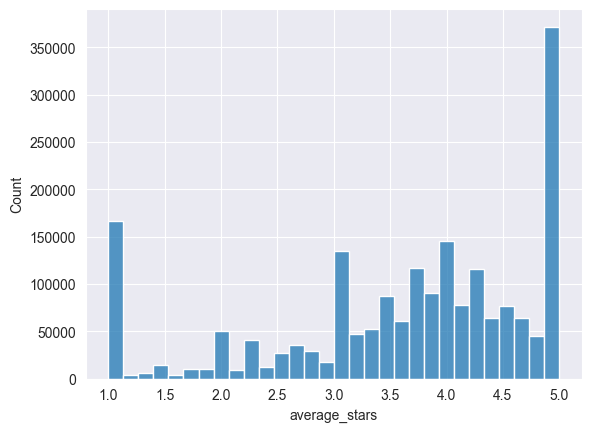

In [49]:
# verificando a distribuição
sns.histplot(df_user.average_stars, bins=30)

> A maioria das pessoas dá notas entre 3 e 4.

In [53]:
# criando a métrica de chatice
df_user['chato'] = df_user.average_stars.median() / df_user.average_stars

In [54]:
df_user.chato.describe()

count    1.987897e+06
mean     1.316672e+00
std      8.498780e-01
min      7.760000e-01
25%      8.508772e-01
50%      1.000000e+00
75%      1.293333e+00
max      3.880000e+00
Name: chato, dtype: float64

> Números acima de 1 são mais críticos, entre 0 e 1 são mais elogiosos.

## compliments

In [57]:
# verificando se há nulos
df_user[['compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos']].isna().sum()

compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

In [58]:
# verificando o comportamento dos dados
df_user[['compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos']].describe()

,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06
mean,1.807072e+00,2.922631e-01,1.793176e-01,1.336493e-01,6.390723e-02,1.443135e+00,3.011841e+00,2.829308e+00,2.829308e+00,1.056448e+00,1.226859e+00
std,7.360184e+01,1.282467e+01,1.515525e+01,1.135682e+01,1.004363e+01,6.016790e+01,1.193898e+02,9.666385e+01,9.666385e+01,3.217973e+01,9.515751e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,2.578400e+04,1.350100e+04,1.418000e+04,1.365400e+04,1.266900e+04,5.903100e+04,1.010970e+05,4.996700e+04,4.996700e+04,1.593400e+04,8.263000e+04


> cerca de 75% das pessoas não recebem elogios.

C:\Users\alexv\anaconda3\envs\RedesNeuraisProfundas\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\alexv\anaconda3\envs\RedesNeuraisProfundas\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\alexv\anaconda3\envs\RedesNeuraisProfundas\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\alexv\anaconda3\envs\RedesNeuraisProfundas\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\alexv\anaconda3\envs\RedesNeuraisProfundas\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inp

<AxesSubplot:xlabel='compliment_photos', ylabel='Count'>

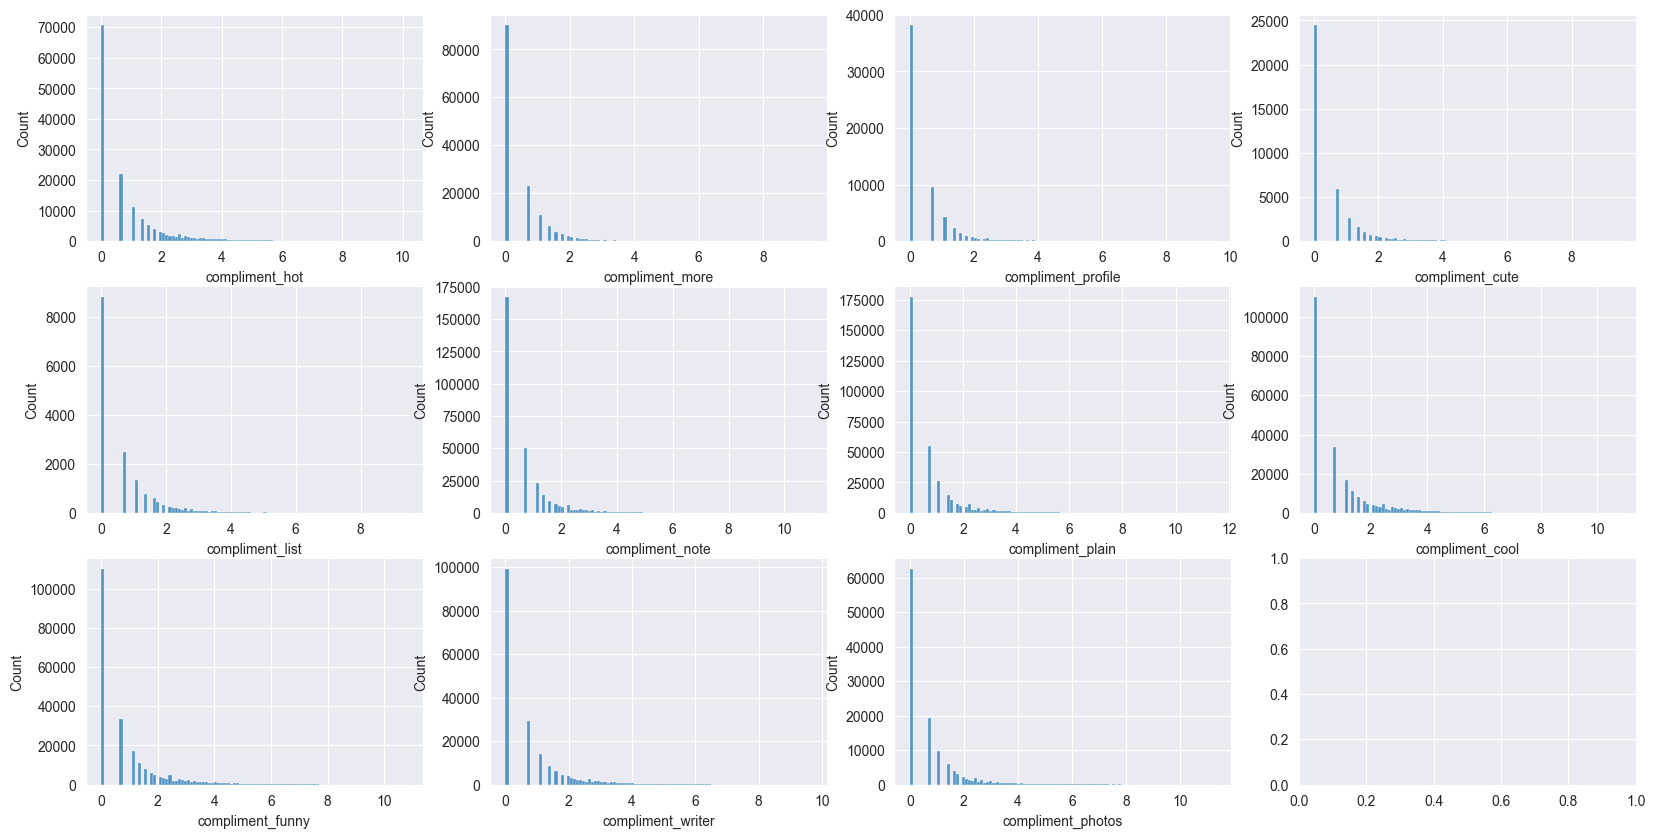

In [61]:
# verificando a distribuição em escala logariticmica todos os compliments
plt, axes = plt.subplots(3, 4, figsize=(20, 10))
sns.histplot(np.log(df_user.compliment_hot), bins=100, ax=axes[0, 0])
sns.histplot(np.log(df_user.compliment_more), bins=100, ax=axes[0, 1])
sns.histplot(np.log(df_user.compliment_profile), bins=100, ax=axes[0, 2])
sns.histplot(np.log(df_user.compliment_cute), bins=100, ax=axes[0, 3])
sns.histplot(np.log(df_user.compliment_list), bins=100, ax=axes[1, 0])
sns.histplot(np.log(df_user.compliment_note), bins=100, ax=axes[1, 1])
sns.histplot(np.log(df_user.compliment_plain), bins=100, ax=axes[1, 2])
sns.histplot(np.log(df_user.compliment_cool), bins=100, ax=axes[1, 3])
sns.histplot(np.log(df_user.compliment_funny), bins=100, ax=axes[2, 0])
sns.histplot(np.log(df_user.compliment_writer), bins=100, ax=axes[2, 1])
sns.histplot(np.log(df_user.compliment_photos), bins=100, ax=axes[2, 2])


> COmportamento semelhante, com outliers. O jeito é usar escala logaritmica.